In [1]:
import math

import pandas as pd
import seaborn as sns

In [2]:
stages = ['Swim', 'T1', 'Bike', 'T2', 'Run']

In [3]:
def convert_to_time(time_str):
    if type(time_str) is not str:
        return None

    if len(time_str) <= 5:
        time_str = '00:' + time_str
    else:
        time_str = '0' + time_str

    return pd.to_timedelta(time_str)

In [4]:
def load_data(stages):
    results_raw = pd.read_csv('../data/2023_lake_whatcom/ResultListsOverallResults.csv')
    results_raw.columns = results_raw.iloc[1]
    
    results_raw = results_raw.dropna(subset=['Bib'])
    results_raw = results_raw[results_raw['Bib'] != 'Bib']
    results_raw = results_raw.reset_index(drop=True)
    
    for stage in stages + ['Finish']:
        results_raw[stage] = results_raw[stage].apply(convert_to_time)

    return results_raw

results = load_data(stages)
results

1,Place,Bib,Name,Age,Gender,AG,Club,Swim,T1,Bike,T2,Run,Finish
0,1,252,"Toth, Anthony",42,M,Male 40-44,NaN,0 days 00:21:41,0 days 00:00:35,0 days 01:06:00,0 days 00:00:51,0 days 00:41:51,0 days 02:11:00
1,2,258,"Michel, Jonathan",34,M,Male 35-39,NaN,0 days 00:21:35,0 days 00:01:11,0 days 01:07:15,0 days 00:00:59,0 days 00:41:16,0 days 02:12:17
2,3,168,"Hughes, Chris",42,M,Male 40-44,NaN,0 days 00:24:00,0 days 00:01:13,0 days 01:03:09,0 days 00:01:00,0 days 00:44:20,0 days 02:13:44
3,4,199,"Hippe, Scott",34,M,Male 30-34,NaN,0 days 00:25:12,0 days 00:01:19,0 days 01:07:15,0 days 00:00:42,0 days 00:42:45,0 days 02:17:15
4,5,81,"Paulsen, Eric",45,M,Male 45-49,NaN,0 days 00:23:55,0 days 00:01:29,0 days 01:07:23,0 days 00:01:24,0 days 00:44:16,0 days 02:18:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,18,"Hunt, Stephanie",43,F,Female 40-44,Pathetic Triathletes Group,0 days 00:38:34,0 days 00:02:57,0 days 02:12:47,0 days 00:02:34,0 days 02:02:29,0 days 04:59:23
215,216,72,"Schneck, Teo",59,M,Male 55-59,NaN,0 days 00:42:19,NaT,0 days 03:22:52,0 days 00:08:18,0 days 01:31:00,0 days 05:02:10
216,DNF,48,"Torres, Ernesto",21,M,Male 20-24,NaN,NaT,NaT,NaT,NaT,NaT,NaT
217,DNF,262,"Parra, Anthony",26,M,Male 25-29,Tri to Survive,0 days 00:42:48,0 days 00:06:46,0 days 02:36:02,0 days 00:02:06,NaT,NaT


In [5]:
results[results['Name']  == 'Hurst, Luke']

1,Place,Bib,Name,Age,Gender,AG,Club,Swim,T1,Bike,T2,Run,Finish
22,23,20,"Hurst, Luke",28,M,Male 25-29,NaN,0 days 00:27:49,0 days 00:02:03,0 days 01:20:24,0 days 00:00:54,0 days 00:40:48,0 days 02:31:59


In [6]:
results[results['Name']  == 'Vercelli, Emma']

1,Place,Bib,Name,Age,Gender,AG,Club,Swim,T1,Bike,T2,Run,Finish
150,151,19,"Vercelli, Emma",26,F,Female 25-29,NaN,0 days 00:33:47,0 days 00:02:40,0 days 01:42:15,0 days 00:02:19,0 days 01:00:24,0 days 03:21:27


In [7]:
for stage in stages:
    results[f'{stage}_rank'] = results[f'{stage}'].rank(method='max')
    results[f'{stage}_pct_rank'] = results[f'{stage}'].rank(method='max', pct=True, ascending=False)

rank_cols = []
for stage in stages:
    rank_cols.append(f'{stage}_rank')
    rank_cols.append(f'{stage}_pct_rank')
    
results[results['Name'].isin(['Hurst, Luke', 'Vercelli, Emma'])][['Name'] + stages + rank_cols]

1,Name,Swim,T1,Bike,T2,Run,Swim_rank,Swim_pct_rank,T1_rank,T1_pct_rank,Bike_rank,Bike_pct_rank,T2_rank,T2_pct_rank,Run_rank,Run_pct_rank
22,"Hurst, Luke",0 days 00:27:49,0 days 00:02:03,0 days 01:20:24,0 days 00:00:54,0 days 00:40:48,42.0,0.811060,67.0,0.694836,69.0,0.686636,26.0,0.884259,2.0,0.995370
150,"Vercelli, Emma",0 days 00:33:47,0 days 00:02:40,0 days 01:42:15,0 days 00:02:19,0 days 01:00:24,131.0,0.400922,103.0,0.521127,174.0,0.202765,177.0,0.185185,111.0,0.490741


In [8]:
for stage in stages:    
    results[f'{stage}_po'] = results[stage].min() / results[stage] * 100

po_cols = []
for stage in stages:
    po_cols.append(f'{stage}_po')
    
results[results['Name'].isin(['Hurst, Luke', 'Vercelli, Emma'])][['Name'] + stages + po_cols]

1,Name,Swim,T1,Bike,T2,Run,Swim_po,T1_po,Bike_po,T2_po,Run_po
22,"Hurst, Luke",0 days 00:27:49,0 days 00:02:03,0 days 01:20:24,0 days 00:00:54,0 days 00:40:48,77.591372,8.130081,78.544776,40.740741,96.813725
150,"Vercelli, Emma",0 days 00:33:47,0 days 00:02:40,0 days 01:42:15,0 days 00:02:19,0 days 01:00:24,63.887519,6.250000,61.760391,15.827338,65.397351


In [9]:
results['Swim_cmtv'] = results['Swim']

for index, stage in enumerate(stages[1:]):
    results[f'{stage}_cmtv'] = results[f'{stages[index]}_cmtv'] + results[f'{stage}']

for stage in stages:
    results[f'{stage}_cmtv_rank'] = results[f'{stage}_cmtv'].rank(method='max')
    results[f'{stage}_cmtv_pct_rank'] = results[f'{stage}_cmtv'].rank(method='max', pct=True, ascending=False)

cmtv_cols = []
for stage in stages:
    cmtv_cols.append(f'{stage}_cmtv')
    cmtv_cols.append(f'{stage}_cmtv_rank')
    cmtv_cols.append(f'{stage}_cmtv_pct_rank')
    
results[results['Name'].isin(['Hurst, Luke', 'Vercelli, Emma'])][['Name'] + cmtv_cols]

1,Name,Swim_cmtv,Swim_cmtv_rank,Swim_cmtv_pct_rank,T1_cmtv,T1_cmtv_rank,T1_cmtv_pct_rank,Bike_cmtv,Bike_cmtv_rank,Bike_cmtv_pct_rank,T2_cmtv,T2_cmtv_rank,T2_cmtv_pct_rank,Run_cmtv,Run_cmtv_rank,Run_cmtv_pct_rank
22,"Hurst, Luke",0 days 00:27:49,42.0,0.811060,0 days 00:29:52,45.0,0.793427,0 days 01:50:16,58.0,0.737089,0 days 01:51:10,57.0,0.737089,0 days 02:31:58,23.0,0.896226
150,"Vercelli, Emma",0 days 00:33:47,131.0,0.400922,0 days 00:36:27,120.0,0.441315,0 days 02:18:42,165.0,0.230047,0 days 02:21:01,165.0,0.234742,0 days 03:21:25,150.0,0.297170


In [17]:
cmtv_rank_cols = [col for col in cmtv_cols if 'rank' in col and 'pct' not in col]

In [33]:
plot_results_cmtv_rank = results[results['Name'].isin(['Hurst, Luke', 'Vercelli, Emma', 'Boswell, Lexie'])][["Name"] + cmtv_rank_cols].melt(
    id_vars=["Name"], 
    var_name="stage_cmtv", 
    value_name="cmtv_time"
)

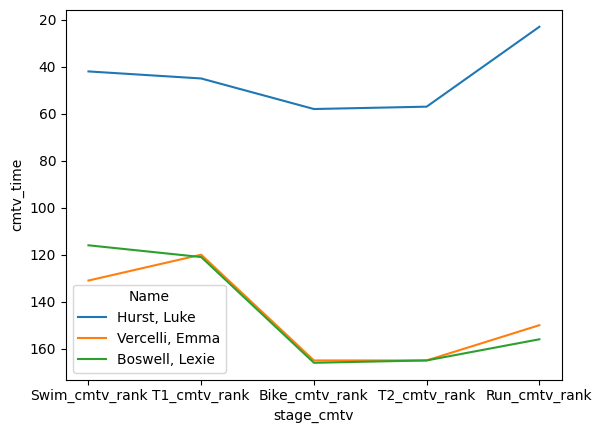

In [34]:
ax = sns.lineplot(data=plot_results_cmtv_rank, x="stage_cmtv", y="cmtv_time", hue="Name", sort=False)
ax.invert_yaxis()